# ***Etapa I: Install și setup***

In [ ]:
!pip install  tensorflow

In [ ]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ***Etapa II: Importarea setului de date din kaggle pe Colab***

In [ ]:
#install kaggle API
! pip install kaggle

In [ ]:
#create a directory as kaggle
! mkdir -p ~/.kaggle

In [ ]:
#import kaggle API
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle

In [ ]:
# disable the API key
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# list of datasets
! kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          24280        484  0.9411765        
bhavikjikadara/student-study-performance                    Student Study Performance                        9KB  2024-03-07 06:14:09          12011        154  1.0              
sukhmandeepsinghbrar/housing-price-dataset                  Housing Price Dataset                          780KB  2024-04-04 19:45:43           1445         28  1.0              
muhammadkashif724/netflix-tv-shows-2021                     Netflix TV Shows 2021                        

In [ ]:
# import the dataset
! kaggle datasets download -d mlg-ulb/creditcardfraud


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 88% 58.0M/66.0M [00:00<00:00, 216MB/s]
100% 66.0M/66.0M [00:00<00:00, 204MB/s]


In [ ]:
# unzip dataset
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
dataset_1 = pd.read_csv('/content/creditcard.csv')

In [ ]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# ***Etapa III: Preprocesarea datelor***

In [ ]:
dataset_1.shape

(284807, 31)

In [ ]:
#checking the null values
dataset_1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# observation in each class
dataset_1['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
# balance the dataset
fraud = dataset_1[dataset_1['Class']==1]
non_fraud = dataset_1[dataset_1['Class']==0]

In [ ]:
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

In [ ]:
# random selection of samples
non_fraud_t = non_fraud.sample(n=492)

In [ ]:
non_fraud_t.shape

(492, 31)

In [ ]:
# merge dataset
dataset = fraud._append(non_fraud_t, ignore_index=True)

In [ ]:
print(dataset)

         Time        V1        V2        V3        V4        V5        V6  \
0       406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1       472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
..        ...       ...       ...       ...       ...       ...       ...   
979  158669.0  1.950833 -0.256347 -0.262753  0.425228 -0.539305 -0.433637   
980   40366.0 -0.614410 -3.489618 -0.186192  0.073676 -2.230848 -0.471391   
981   78282.0  1.276509  0.600085 -0.826024  0.966923  0.658203 -0.265187   
982  151533.0  2.111395 -0.121922 -1.369305  0.261088  0.125697 -0.836679   
983   72896.0 -3.293563  1.827384  0.342618  0.442482 -0.045807  0.715879   

           V7        V8        V9  ...       V21       V22       V23  \
0  

In [ ]:
# observation in each class
dataset['Class'].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

In [ ]:
# matrix of features
x = dataset.drop(labels=['Class'], axis=1)

In [ ]:
# depend variable
y = dataset['Class']

In [ ]:
x.shape, y.shape

((984, 30), (984,))

In [ ]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [ ]:
# reshape the dataset
x_train = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197, 30, 1)

In [ ]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

# ***Etapa IV:Construirea modelului***

In [ ]:
# defining an object
model = tf.keras.models.Sequential()

In [ ]:
# first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu',input_shape =(30,1)))

#batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

#dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
# second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))

#batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

#dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# first dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

#dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 30, 32)            128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 15, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 15, 64)            2

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# ***Etapa V: Antrenarea modelului***

In [ ]:
history =  model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
25/25 [==============================] - 2s 21ms/step - loss: 0.2299 - accuracy: 0.9149 - precision_2: 0.9372 - recall_2: 0.8928 - val_loss: 0.1511 - val_accuracy: 0.9543 - val_precision_2: 1.0000 - val_recall_2: 0.9011
Epoch 2/25
25/25 [==============================] - 0s 8ms/step - loss: 0.2383 - accuracy: 0.9047 - precision_2: 0.9405 - recall_2: 0.8678 - val_loss: 0.1501 - val_accuracy: 0.9543 - val_precision_2: 1.0000 - val_recall_2: 0.9011
Epoch 3/25
25/25 [==============================] - 0s 8ms/step - loss: 0.2180 - accuracy: 0.9199 - precision_2: 0.9519 - recall_2: 0.8878 - val_loss: 0.1472 - val_accuracy: 0.9594 - val_precision_2: 1.0000 - val_recall_2: 0.9121
Epoch 4/25
25/25 [==============================] - 0s 7ms/step - loss: 0.2055 - accuracy: 0.9225 - precision_2: 0.9570 - recall_2: 0.8878 - val_loss: 0.1461 - val_accuracy: 0.9594 - val_precision_2: 1.0000 - val_recall_2: 0.9121
Epoch 5/25
25/25 [==============================] - 0s 8ms/step - loss: 0.2255 

In [ ]:
y_pred = model.predict(x_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
y_pred = np.where(y_pred > 0.5 , 1,0)

In [ ]:
print (y_pred)

[[0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]


In [ ]:
print(y_pred[5]), print(y_test[5]), print(y_test[5])

0
1
1


(None, None, None)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[105   1]
 [  8  83]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9543147208121827


# ***Etapa VI: Learning Curve***

In [ ]:
def learning_curve(history, epoch):

  #training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  #training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

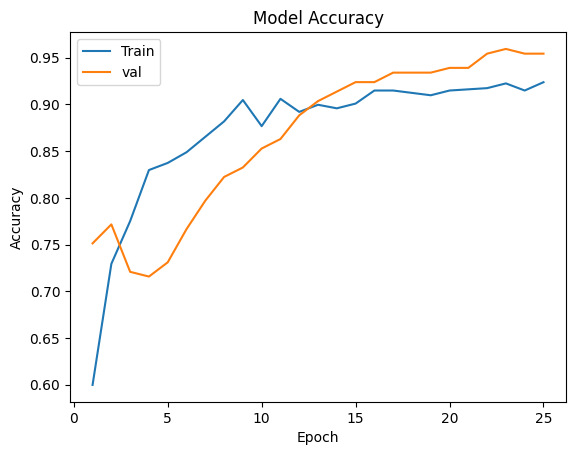

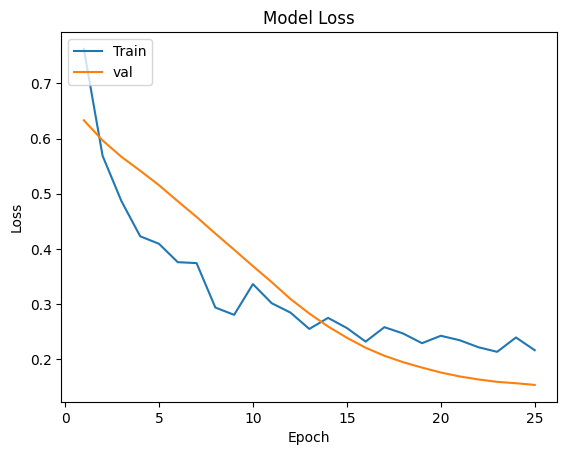

In [ ]:
learning_curve(history, 25)

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision_2', 'recall_2', 'val_loss', 'val_accuracy', 'val_precision_2', 'val_recall_2'])


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from tqdm import tqdm

pre = Precision()
re = Recall()
acc = BinaryAccuracy()
tp = TruePositives()
tn = TrueNegatives()
fp = FalsePositives()
fn = FalseNegatives()



for i, batch in (enumerate(zip(x_test,y_test)) ):

    X, y = batch
    X = np.reshape(X , (1,30,1))
    print(X.shape)
    yhat = model.predict(X)
    yhat = np.where(yhat > 0.5 , 1,0)
    y = np.reshape(y,(1,1))
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    tp.update_state(y, yhat)
    tn.update_state(y, yhat)
    fp.update_state(y, yhat)
    fn.update_state(y, yhat)
    if(i>len(y_test)):
     break

print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Binary Accuracy:", acc.result().numpy())
print("True Positives:", tp.result().numpy())
print("True Negatives:", tn.result().numpy())
print("False Positives:", fp.result().numpy())
print("False Negatives:", fn.result().numpy())

(1, 30, 1)
1/1 [==============================] - 0s 23ms/step
(1, 30, 1)
1/1 [==============================] - 0s 21ms/step
(1, 30, 1)
1/1 [==============================] - 0s 23ms/step
(1, 30, 1)
1/1 [==============================] - 0s 22ms/step
(1, 30, 1)
1/1 [==============================] - 0s 24ms/step
(1, 30, 1)
1/1 [==============================] - 0s 22ms/step
(1, 30, 1)
1/1 [==============================] - 0s 24ms/step
(1, 30, 1)
1/1 [==============================] - 0s 22ms/step
(1, 30, 1)
1/1 [==============================] - 0s 21ms/step
(1, 30, 1)
1/1 [==============================] - 0s 23ms/step
(1, 30, 1)
1/1 [==============================] - 0s 24ms/step
(1, 30, 1)
1/1 [==============================] - 0s 23ms/step
(1, 30, 1)
1/1 [==============================] - 0s 23ms/step
(1, 30, 1)
1/1 [==============================] - 0s 22ms/step
(1, 30, 1)
1/1 [==============================] - 0s 22ms/step
(1, 30, 1)
1/1 [==============================] - 0s 21

In [ ]:
print(x_test.shape)

(197, 30, 1)


In [ ]:
def learning_curve(history, epoch):

  #training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  #training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  #training vs validation precision
  plt.plot(epoch_range, history.history['precision_2'])
  plt.plot(epoch_range, history.history['val_precision_2'])
  plt.title('Model Precision')
  plt.ylabel('Precision')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()


  #training vs validation precision
  plt.plot(epoch_range, history.history['recall_2'])
  plt.plot(epoch_range, history.history['val_recall_2'])
  plt.title('Model Recall')
  plt.ylabel('Recall')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

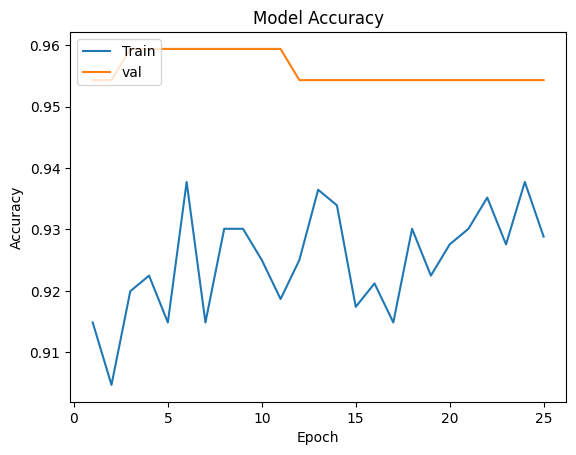

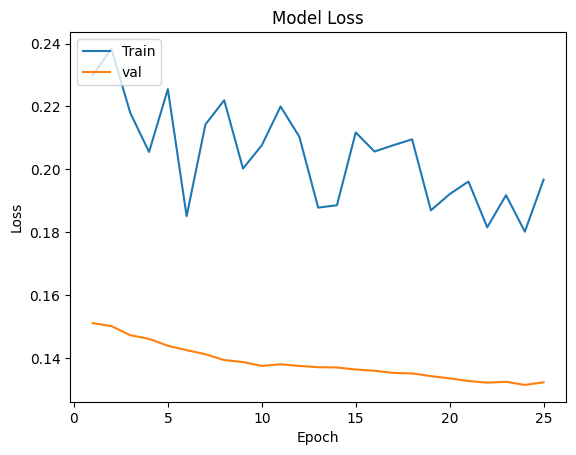

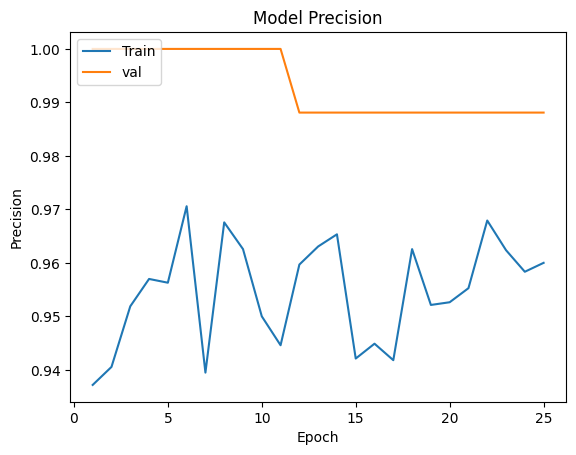

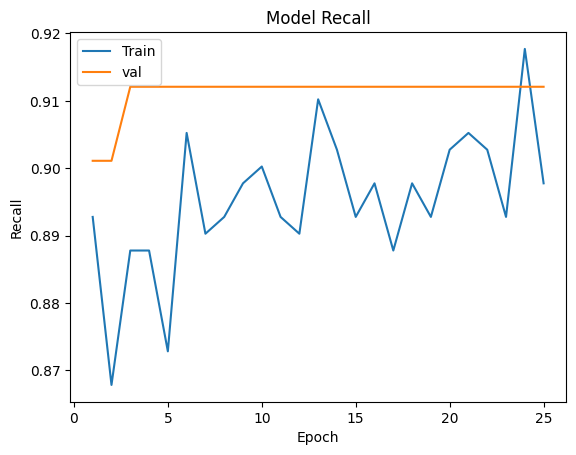

In [ ]:
learning_curve(history, 25)

In [ ]:
# Salvare în Google Colab
df.to_csv('fraud_results.csv', index=False)
print("Fișierul a fost salvat în mediul Colab!")


Fișierul a fost salvat în mediul Colab!


In [ ]:
from google.colab import files

# Descărcare fișier
files.download('fraud_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Exemplu de rezultate după rularea modelului
results = {
    "transaction_id": [1, 2, 3, 4, 5],
    "fraud_probability": [0.2, 0.95, 0.1, 0.8, 0.99]
}
df = pd.DataFrame(results)
